In [112]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from scipy.fft import fft, ifft

In [113]:
def init_clusters(data, row_count, n_clusters):
    return data [ np.random.choice(row_count, size=n_clusters, replace=False) ]

In [114]:
class KMeans:

    def __init__(self, n_clusters, tolerance, max_iter, runs, init_method="random"):
        self.init_method = init_method
        self.runs = runs
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.ClusterCentres = np.zeros(n_clusters)
        self.tolerance = tolerance
        
        
    def fit(self, data):
        RowCount, ColCount = data.shape
        DataValues = self.GetValues(data)
        DataLabels = np.zeros(RowCount)
        costs = np.zeros(self.runs)
        all_clusterings = []

        for i in range(self.runs):
            ClusterCentres =  self.InitMeans(DataValues, RowCount)
            for _ in range(self.max_iter):            
                PreviousMeans = np.copy(ClusterCentres)
                distances = self.GetDistances(DataValues, ClusterCentres, RowCount)
                DataLabels = self.Getlabels(distances)
                ClusterCentres = self.GetMeans(DataValues, DataLabels, ColCount)
                clusters_not_changed = np.abs(ClusterCentres - PreviousMeans) < self.tolerance
                if np.all(clusters_not_changed) != False:
                    break
            
            DataValues_with_labels = np.append(DataValues, DataLabels[:, np.newaxis], axis = 1)
            all_clusterings.append( (ClusterCentres, DataValues_with_labels) )
            costs[i] = self.GetCost(DataValues, DataLabels, ClusterCentres)
        OptimumIndex = costs.argmin()
        self.cost_ = costs[OptimumIndex]
        return all_clusterings[OptimumIndex]
        
    def InitMeans(self, data, RowCount):
        if self.init_method == 'random':
            return init_clusters(data, RowCount, self.n_clusters)
               
    def GetDistances(self, data, ClusterCentres, RowCount):
        distances = np.zeros((RowCount, self.n_clusters))
        for ClusterCentre_index, ClusterCentre in enumerate(ClusterCentres):
            distances[:, ClusterCentre_index] = np.linalg.norm(data - ClusterCentre, axis = 1)
        return distances
    
    def Getlabels(self, distances):
        return distances.argmin(axis = 1)
    
    def GetMeans(self, data, labels, ColCount):
        ClusterCentres = np.zeros((self.n_clusters, ColCount))
        for ClusterCentre_index, _ in enumerate(ClusterCentres):
            cluster_elements = data [ labels == ClusterCentre_index ]
            if len(cluster_elements):
                ClusterCentres[ClusterCentre_index, :] = cluster_elements.mean(axis = 0)
        return ClusterCentres
    
    def GetCost(self, data, labels, ClusterCentres):
        cost = 0
        for ClusterCentre_index, ClusterCentre in enumerate(ClusterCentres):
            cluster_elements = data [ labels == ClusterCentre_index ]
            cost += np.linalg.norm(cluster_elements - ClusterCentre, axis = 1).sum()
        return cost
            
    def GetValues(self, data):
        if isinstance(data, np.ndarray):
            return data
        return np.array(data)

In [115]:
#ls data
class1 = pd.read_csv("ls_data/class1.txt",sep=",",header=None,names=["x","y"])
class2 = pd.read_csv("ls_data/class2.txt",sep=",",header=None,names=["x","y"])
class1["label"] = np.array([1 for i in range(len(class1))])
class2["label"] = np.array([2 for i in range(len(class2))])

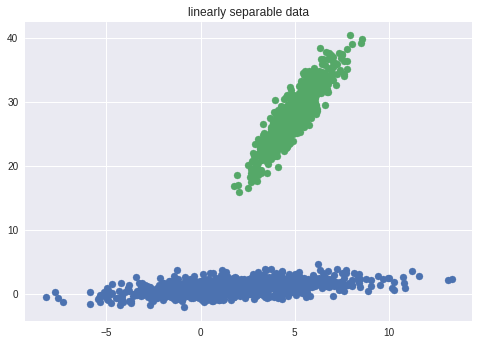

In [116]:
plt.scatter(class1["x"],class1["y"])
plt.scatter(class2["x"],class2["y"])
plt.title("linearly separable data")
plt.show()

In [117]:
class1

,x,y,label
0,3.7003,1.84810,1
1,7.7993,1.28080,1
2,-5.1431,-0.42389,1
3,4.7264,0.81755,1
4,3.0080,1.65800,1
...,...,...,...
995,6.7769,3.49810,1
996,2.5186,1.76250,1
997,1.1058,0.38265,1
998,5.6435,1.43560,1


In [118]:
class2

,x,y,label
0,5.5377,30.999,2
1,6.8339,33.309,2
2,2.7412,19.430,2
3,5.8622,29.904,2
4,5.3188,30.070,2
...,...,...,...
995,6.5106,36.643,2
996,5.1640,29.864,2
997,4.7172,26.100,2
998,6.1522,31.824,2


In [119]:
newdf = pd.concat([class1,class2])

In [120]:
newdf

,x,y,label
0,3.7003,1.84810,1
1,7.7993,1.28080,1
2,-5.1431,-0.42389,1
3,4.7264,0.81755,1
4,3.0080,1.65800,1
...,...,...,...
995,6.5106,36.64300,2
996,5.1640,29.86400,2
997,4.7172,26.10000,2
998,6.1522,31.82400,2


In [121]:
train,test = train_test_split(newdf,test_size=0.2,random_state=42)

In [122]:
train

,x,y,label
968,3.59610,2.17840,1
240,-1.37320,0.96986,1
819,1.15190,0.14546,1
692,1.32590,3.31850,1
420,0.44097,2.02100,1
...,...,...,...
130,4.64620,27.71400,2
294,5.00120,29.19200,2
860,-1.54910,1.27250,1
459,5.97500,32.20100,2


In [123]:
test

,x,y,label
860,3.8777,25.588000,2
353,-3.7091,-1.402000,1
333,3.5714,22.524000,2
905,-1.2788,-0.069562,1
289,3.3882,25.032000,2
...,...,...,...
965,4.7942,1.903400,1
284,5.9298,33.472000,2
739,6.9444,37.220000,2
261,-3.2626,0.405410,1


In [124]:
model = KMeans(max_iter = 500, tolerance = 0.001, n_clusters = 2, runs = 100)
(clusters, DatawClusters) = model.fit(train[["x","y"]])

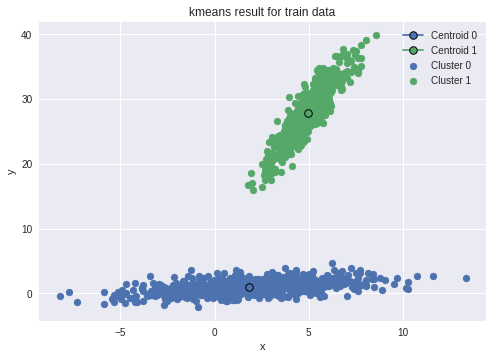

In [125]:
for i, ClusterCentroid in enumerate(clusters):
    DataCluster_i = DatawClusters[ DatawClusters[:, -1] == i ]
    plt.scatter(DataCluster_i[:, 0], DataCluster_i[:, 1], label = 'Cluster ' + str(i))
    plt.plot(ClusterCentroid[0], ClusterCentroid[1], label = 'Centroid ' + str(i), marker='.', markersize=15, markeredgecolor="k", markeredgewidth=1)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.style.use('seaborn')
    plt.title("kmeans result for train data")
    plt.legend()

/home/saksham/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


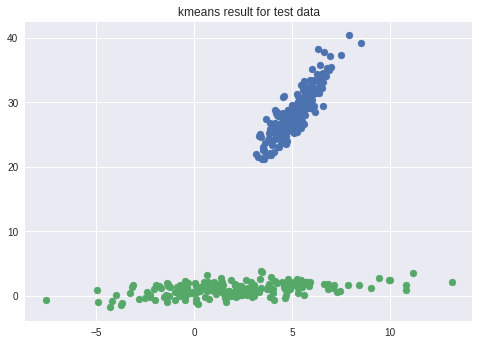

1.0
0.0


In [126]:
y_true=[]
# print(test["label"])
test.reset_index(inplace=True)
# print(test["label"])
for i in test.index:
#     print(test["label"][i])
    if test["label"][i]==1:
        y_true.append(0)
    else:
        y_true.append(1)
        
#generate test labels
# print(test.loc[0,["x","y"]].values)
# print(clusters[0])
y_pred=[]
x1=[]
y1=[]
x0=[]
y0=[]
for i in range(len(test)):
    if np.linalg.norm(test.loc[i,["x","y"]].values-clusters[0])>np.linalg.norm(test.loc[i,["x","y"]].values-clusters[1]):
        y_pred.append(1)
        x1.append(test["x"][i])
        y1.append(test["y"][i])
    else:
        y_pred.append(0)
        x0.append(test["x"][i])
        y0.append(test["y"][i])

test["preds"]=y_pred

plt.scatter(x1,y1)
plt.scatter(x0,y0)
plt.title("kmeans result for test data")
plt.show()
        
        
# print(pd.DataFrame(test.groupby(["preds"])).loc[0])
# plt.scatter(test.groupby(["preds"])[0])
print(accuracy_score(y_true,y_pred))
print(1-accuracy_score(y_true,y_pred))

In [127]:
#nls data
class1 = pd.read_csv("nls_data/class1.txt",sep=",",header=None,names=["x","y"])
class2 = pd.read_csv("nls_data/class2.txt",sep=",",header=None,names=["x","y"])
class1["label"] = np.array([1 for i in range(len(class1))])
class2["label"] = np.array([2 for i in range(len(class2))])

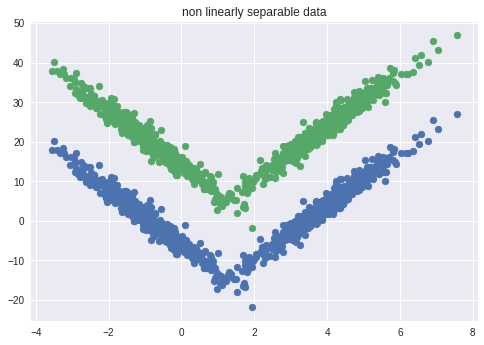

In [128]:
plt.scatter(class1["x"],class1["y"])
plt.scatter(class2["x"],class2["y"])
plt.title("non linearly separable data")
plt.show()

In [129]:
class1

,x,y,label
0,4.53770,7.5864,1
1,5.83390,18.0430,1
2,1.74120,-11.3020,1
3,4.86220,10.3990,1
4,4.31880,6.3741,1
...,...,...,...
995,-2.90240,17.2550,1
996,1.37420,-14.1800,1
997,-1.23330,1.7615,1
998,-0.59612,-1.9816,1


In [130]:
class2

,x,y,label
0,4.53770,27.5860,2
1,5.83390,38.0430,2
2,1.74120,8.6980,2
3,4.86220,30.3990,2
4,4.31880,26.3740,2
...,...,...,...
995,-2.90240,37.2550,2
996,1.37420,5.8201,2
997,-1.23330,21.7620,2
998,-0.59612,18.0180,2


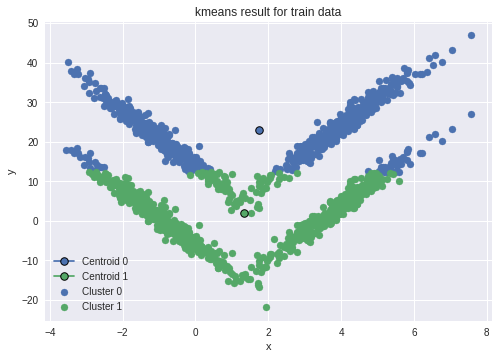

In [131]:
newdf = pd.concat([class1,class2])
train,test = train_test_split(newdf,test_size=0.2,random_state=42)
model = KMeans(max_iter = 500, tolerance = 0.001, n_clusters = 2, runs = 100)
(clusters, DatawClusters) = model.fit(train[["x","y"]])
for i, cluster_mean in enumerate(clusters):
    DataClusteri = DatawClusters[ DatawClusters[:, -1] == i ]
    plt.scatter(DataClusteri[:, 0], DataClusteri[:, 1], label = 'Cluster ' + str(i))
    plt.plot(cluster_mean[0], cluster_mean[1], label = 'Centroid ' + str(i), marker='.', markersize=15, markeredgecolor="k", markeredgewidth=1)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.style.use('seaborn')
    plt.title("kmeans result for train data")
    plt.legend()

In [132]:
clusters

array([[ 1.73990991, 22.97398597],
       [ 1.34059569,  1.87010313]])

/home/saksham/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


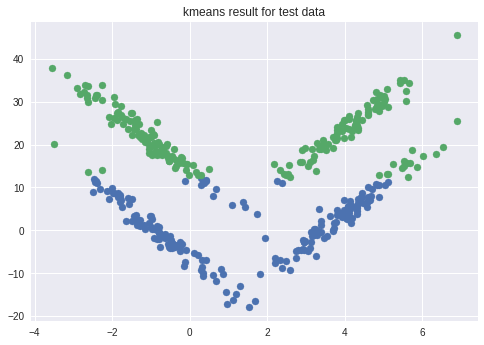

0.0875

In [133]:
y_true=[]
# print(test["label"])
test.reset_index(inplace=True)
# print(test["label"])
for i in test.index:
#     print(test["label"][i])
    if test["label"][i]==1:
        y_true.append(0)
    else:
        y_true.append(1)
        
#generate test labels
# print(test.loc[0,["x","y"]].values)
# print(clusters[0])
y_pred=[]
x1=[]
y1=[]
x0=[]
y0=[]
for i in range(len(test)):
    if np.linalg.norm(test.loc[i,["x","y"]].values-clusters[0])>np.linalg.norm(test.loc[i,["x","y"]].values-clusters[1]):
        y_pred.append(1)
        x1.append(test["x"][i])
        y1.append(test["y"][i])
    else:
        y_pred.append(0)
        x0.append(test["x"][i])
        y0.append(test["y"][i])

test["preds"]=y_pred

plt.scatter(x1,y1)
plt.scatter(x0,y0)
plt.title("kmeans result for test data")
plt.show()
        
        
# print(pd.DataFrame(test.groupby(["preds"])).loc[0])
# plt.scatter(test.groupby(["preds"])[0])
accuracy_score(y_true,y_pred)

In [134]:
import dill as pickle
import collections
import os
artifact_type_data = collections.namedtuple('artifact_type_data', ['patient_id','artifact_type',
'data'])
folder_path="/home/saksham/Documents/BE502/a3/EEG files/"

total_data=[]

fourier_transform=[]

time_domain=[]
y_true = []
for file_name in os.listdir(folder_path):
    file_path="EEG files/"+file_name
    type_data = pickle.load(open(file_path, 'rb'))
    time_series_data = type_data.data
#     print('Shape is', time_series_data.shape)
    # print(time_series_data)

    new_data=[[] for i in range(20)]
    #resolve shape
    for j in range(len(time_series_data)):
        for i in range(0, len(time_series_data[j]), 250):
    #             print((time_series_data[j][i:i+250]).shape)
            if i+250<len(time_series_data[j]):
                new_data[j].append(time_series_data[j][i:i+250])
    arr = (np.array(new_data))
#     arr.shape
    #20*13*250
    
    #for each channel convert to frequency domain
    tempfft=[]
    for i in range(arr.shape[1]):
        arr_in_seconds = []
        arr_time = []
        for j in range(20):
            arr_in_seconds.append(fft(arr[j][i]))
            arr_time.append(arr[j][i])
        time_domain.append(arr_time)
        #0 for eyem and 1 for chew
        if file_name[-8:-4] == "eyem":
            y_true.append(0)
        else:
            y_true.append(1)
        fourier_transform.append(arr_in_seconds)
        tempfft.append(arr_in_seconds)
    
    arr = np.array(tempfft)
    
    # now flatten it

#     final_data=[]
    for i in range(arr.shape[0]):
        arr_in_seconds = []
        for j in range(20):
            for k in range(250):
                arr_in_seconds.append(arr[i][j][k])

#         final_data.append(arr_in_seconds)
        total_data.append(arr_in_seconds)
#     finaldat=np.array(final_data)
#     print(finaldat.shape)

print("length of label array",len(y_true))
timedat = np.array(time_domain)
print("time domain shape",timedat.shape)
fourierdat = np.array(fourier_transform)
print("frequency domain shape",fourierdat.shape)
totaldat = np.array(total_data)
print("flattened array shape",totaldat.shape)

length of label array 2672
time domain shape (2672, 20, 250)
frequency domain shape (2672, 20, 250)
flattened array shape (2672, 5000)


In [135]:
s = "arti_2882_pid_00006448_type_eyem.pkl"
print(s[-8:-4])

eyem


0


/home/saksham/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


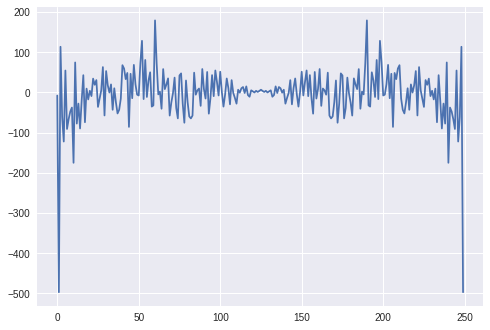

/tmp/ipykernel_15667/4031787229.py:8: UserWarning: Only one segment is calculated since parameter NFFT (=256) >= signal length (=250).
  plt.specgram(time_domain[0][1],Fs=250)


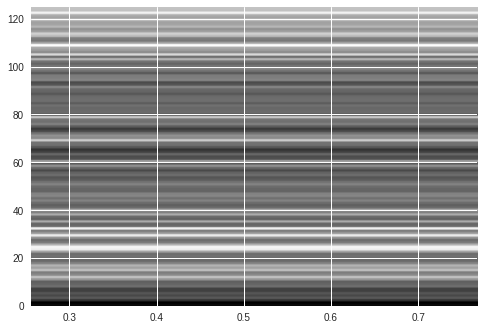

In [136]:
##plotting time
##change time window number and channel number through x and y indices of array 
plt.plot(fourier_transform[15][2])
print(y_true[2])
plt.show()

#spectrogram
plt.specgram(time_domain[0][1],Fs=250)
plt.show()


In [137]:
##now we will apply kmeans
##use flattened array and y_true to create a dataframe
df = pd.DataFrame(total_data)
df["label"]=y_true
print(df)

                           0                          1  \
0      3223.569255-0.000000j  76.117421+00422.95944100j   
1     19210.495223-0.000000j -11861.480147+5040.252238j   
2    -10385.123071-0.000000j   1516.927216-1136.041245j   
3     -6643.366384-0.000000j  502.339339+07843.9684010j   
4     27137.124763-0.000000j -5847.295554+12287.775044j   
...                      ...                        ...   
2667  -2520.348882-0.000000j  -1382.913166+2979.820922j   
2668  -1279.328861-0.000000j   4767.049125+1567.844010j   
2669  -1573.383667-0.000000j   1585.889718+2577.976325j   
2670  -1654.959381-0.000000j   278.7955860+165.0914120j   
2671 -410.0786608-0.0000000j   1145.482855+2542.066686j   

                             2                         3  \
0      23.882608-0119.9498400j   115.3644680-51.6686800j   
1     3122.616242-4761.652084j  -243.3380220-34.2925900j   
2     970.6284090+396.6001270j  781.8188570+239.6019570j   
3    -2832.942401+5677.247343j  -2826.897247-295.41

In [138]:
# newdf = pd.concat([class1,class2])
train,test = train_test_split(df,test_size=0.2,random_state=42)
model = KMeans(max_iter = 50, tolerance = 0.001, n_clusters = 2, runs = 3)
(clusters, data_with_clusters) = model.fit(train.loc[:, train.columns != 'label'])


/tmp/ipykernel_15667/1855582025.py:55: ComplexWarning: Casting complex values to real discards the imaginary part
  ClusterCentres[ClusterCentre_index, :] = cluster_elements.mean(axis = 0)


In [139]:
print(train.head())
print(test.head())

                          0                         1  \
1011  -22957.10729-0.00000j -3743.325491-2659.343138j   
1273 -3537.249289-0.000000j  2860.517804-3280.077152j   
69    2345.210389-0.000000j  -149.758146-1033.294854j   
2539  2642.057259-0.000000j  -5109.814542+976.718528j   
942   8846.020705-0.000000j -7269.557956+1171.775082j   

                             2                         3  \
1011  1413.056462-1239.013814j  -634.6627870-84.1867770j   
1273  2927.847401+2140.733012j  915.3174480+676.7038310j   
69    -38.521552-0495.4668720j  -50.730429+0130.4088270j   
2539   3271.734106-562.481217j  -2557.428004+425.916299j   
942   -1344.530856+574.530887j  2518.294103-1220.505084j   

                             4                        5  \
1011   718.765365-1437.500503j  1267.345480+354.567868j   
1273 -449.5459420+514.9869720j   408.298894-219.044669j   
69   -362.6461930-678.5495040j  -236.824522-345.321137j   
2539   1642.905692+315.357271j -1183.476827-550.706278j   
9

In [140]:
test.reset_index(inplace=True)
y_pred=[]
x1=[]
y1=[]
x0=[]
y0=[]
# print(test.columns[2:5003])
for i in range(len(test)):
    if np.linalg.norm(test.loc[i,test.columns[2:5002]].values-clusters[0])>np.linalg.norm(test.loc[i,test.columns[2:5002]].values-clusters[1]):
        y_pred.append(1)
    else:
        y_pred.append(0)

In [141]:
y_true = test["label"]
print(accuracy_score(y_true,y_pred))
print(1-accuracy_score(y_true,y_pred))


0.35514018691588783
0.6448598130841121
